In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
import missingno as msn
import os

In [2]:
df=pd.read_excel('C:\\Users\\Admin\\OneDrive\\Documentos\\DataScience2021-2\\Trabajos_propios_felipe\\Proyecto_final\\Ordenes de compra PORTAL 1K (datos completo).xlsx')

In [3]:
#Manejo inicial de base de datos
df.drop(labels=['Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28'],axis=1,inplace=True)
df.drop_duplicates(inplace=True)

#Cambiando formato de variables
df['FECHA ORDEN']=pd.to_datetime(df['FECHA ORDEN'],format='%Y-%m-%d',errors = 'coerce')
df['FECHA ENTREGA']=pd.to_datetime(df['FECHA ENTREGA'],format='%Y-%m-%d',errors = 'coerce')
df['FECHA APROBACION']=pd.to_datetime(df['FECHA APROBACION'],format='%Y-%m-%d',errors = 'coerce')
df['FECHA ULTIMO MOVIMIENTO']=pd.to_datetime(df['FECHA ULTIMO MOVIMIENTO'],format='%Y-%m-%d',errors = 'coerce')
df['PRECIO UNITARIO']=df['PRECIO UNITARIO'].apply(lambda x:float(x.replace('.','')))
df['PRECIO UNITARIO + IVA']=df['PRECIO UNITARIO + IVA'].apply(lambda x:float(x.replace('.','')))
df['IVA']=df['IVA'].apply(lambda x:float(x.replace('.','')))
df['TOTAL SIN IVA']=df['TOTAL SIN IVA'].apply(lambda x:float(x.replace('.','')))
df['TOTAL + IVA']=df['TOTAL + IVA'].apply(lambda x:float(x.replace('.','')))

#Eliminamos columnas que no usaremos
df.drop(labels=['CANTIDAD RECIBIDA','CENTRO DE COSTOS','PRESUPUESTO','DIRECCION FACTURACION',
               'FECHA ENTREGA','CODIGO PORTAL'],inplace=True,axis=1)

In [4]:

#Con las fechas de aprobacion
df['dia fecha aprobacion']=df['FECHA APROBACION'].dt.dayofweek #0 lunes, 6 domingo
df['mes fecha aprobacion']=df['FECHA APROBACION'].dt.month #Meses de aprobación 
df['semana del año aprobacion']=df['FECHA APROBACION'].dt.isocalendar().week

#Con las fechas de orden
df['dia fecha orden']=df['FECHA ORDEN'].dt.dayofweek #0 lunes, 6 domingo
df['mes fecha orden']=df['FECHA ORDEN'].dt.month #Meses de ordbación 
df['semana del año orden']=df['FECHA ORDEN'].dt.isocalendar().week
df['dias para aprobación']=(df['FECHA APROBACION']-df['FECHA ORDEN']).dt.days
df['dias proceso']=np.where((df['ESTADO']!='Cancelado')&(df['ESTADO']!='Orden en Proceso')&(df['ESTADO']!='Orden Rechazada'),
                            
                            (df['FECHA ULTIMO MOVIMIENTO']-df['FECHA APROBACION']).dt.days,np.nan)
pd.set_option('display.max_columns', None)

In [5]:
df['dias proceso'].describe()

count    15286.000000
mean        10.446749
std         21.894738
min          0.000000
25%          0.000000
50%          2.000000
75%         11.000000
max        229.000000
Name: dias proceso, dtype: float64

In [6]:
df.shape

(22392, 28)

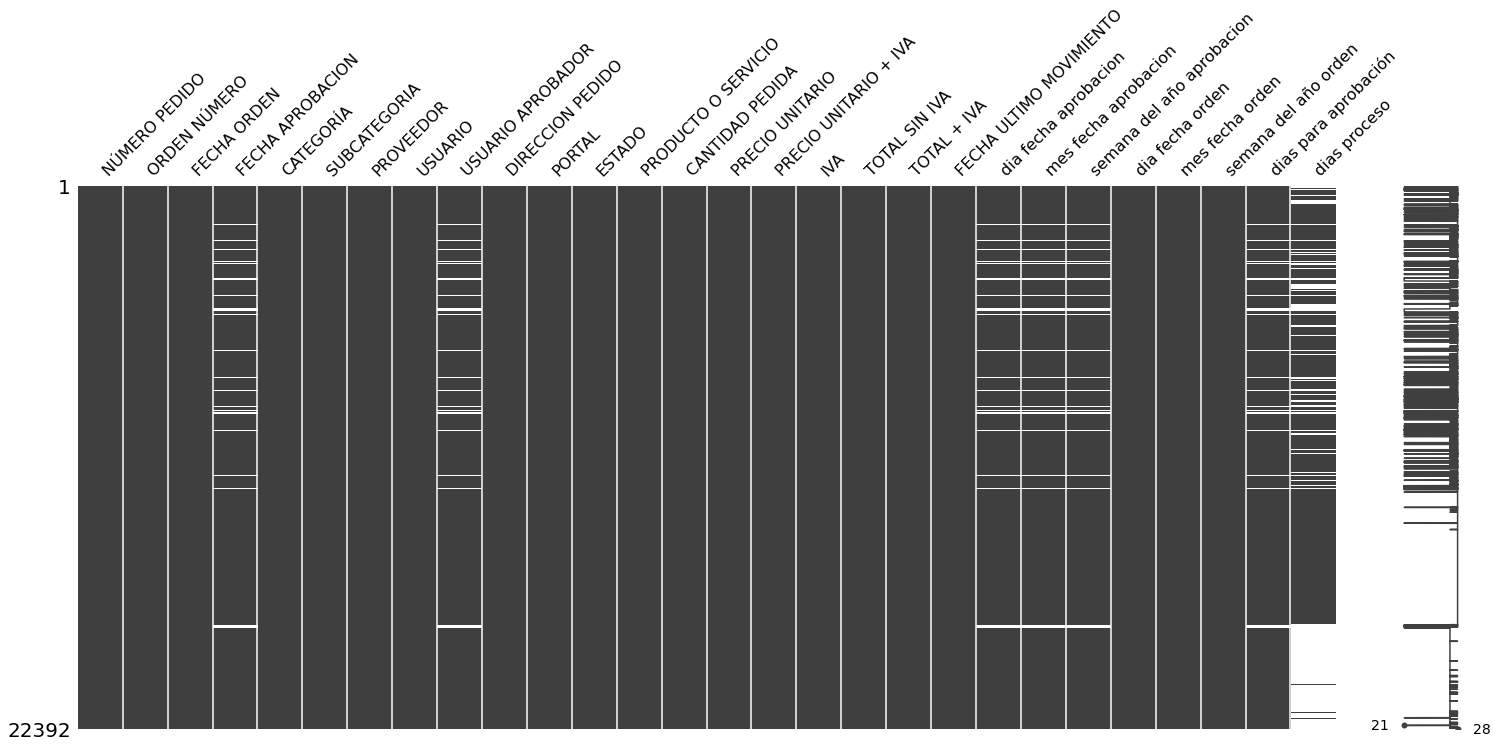

In [7]:
msn.matrix(df);

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(15286, 28)

In [10]:
df['dias proceso']=df['dias proceso'].astype('int64')

In [11]:
df.corr()['dias proceso'].T.sort_values(ascending=False)

dias proceso                 1.000000
mes fecha aprobacion         0.200342
semana del año aprobacion    0.196336
dia fecha orden              0.028749
CANTIDAD PEDIDA              0.000213
PRECIO UNITARIO             -0.008197
IVA                         -0.008214
PRECIO UNITARIO + IVA       -0.008285
TOTAL SIN IVA               -0.047664
TOTAL + IVA                 -0.048979
semana del año orden        -0.135717
dia fecha aprobacion        -0.141138
mes fecha orden             -0.142208
dias para aprobación        -0.284325
Name: dias proceso, dtype: float64

In [12]:
from scipy.stats import f_oneway
stat, p = f_oneway(*df.groupby('PROVEEDOR')['dias proceso'].apply(lambda x:list(x)))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probable distribución igual')
else:
    print('Significancia estadistica, para distribuciones diferentes en dias proceso de proveedores')

stat=27.335, p=0.000
Significancia estadistica, para distribuciones diferentes en dias proceso de proveedores


In [13]:
stat, p = f_oneway(*df.groupby('CATEGORÍA')['dias proceso'].apply(lambda x:list(x)))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probable distribución igual')
else:
    print('Significancia estadistica, para distribuciones diferentes en dias proceso de las categorias')

stat=70.318, p=0.000
Significancia estadistica, para distribuciones diferentes en dias proceso de las categorias


In [14]:
df.columns

Index(['NÚMERO PEDIDO', 'ORDEN NÚMERO', 'FECHA ORDEN', 'FECHA APROBACION',
       'CATEGORÍA', 'SUBCATEGORIA', 'PROVEEDOR', 'USUARIO',
       'USUARIO APROBADOR', 'DIRECCION PEDIDO', 'PORTAL', 'ESTADO',
       'PRODUCTO O SERVICIO', 'CANTIDAD PEDIDA', 'PRECIO UNITARIO',
       'PRECIO UNITARIO + IVA', 'IVA', 'TOTAL SIN IVA', 'TOTAL + IVA',
       'FECHA ULTIMO MOVIMIENTO', 'dia fecha aprobacion',
       'mes fecha aprobacion', 'semana del año aprobacion', 'dia fecha orden',
       'mes fecha orden', 'semana del año orden', 'dias para aprobación',
       'dias proceso'],
      dtype='object')

In [15]:
stat, p = f_oneway(*df.groupby('USUARIO')['dias proceso'].apply(lambda x:list(x)))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probable distribución igual')
else:
    print('Significancia estadistica, para distribuciones diferentes  de  dias proceso de los usuarios')

stat=58.304, p=0.000
Significancia estadistica, para distribuciones diferentes  de  dias proceso de los usuarios


In [16]:
df


,NÚMERO PEDIDO,ORDEN NÚMERO,FECHA ORDEN,FECHA APROBACION,CATEGORÍA,SUBCATEGORIA,PROVEEDOR,USUARIO,USUARIO APROBADOR,DIRECCION PEDIDO,PORTAL,ESTADO,PRODUCTO O SERVICIO,CANTIDAD PEDIDA,PRECIO UNITARIO,PRECIO UNITARIO + IVA,IVA,TOTAL SIN IVA,TOTAL + IVA,FECHA ULTIMO MOVIMIENTO,dia fecha aprobacion,mes fecha aprobacion,semana del año aprobacion,dia fecha orden,mes fecha orden,semana del año orden,dias para aprobación,dias proceso
1,# 49560,# 2581,2021-11-10,2021-11-10,Mercadeo y publicidad,Publicidad,Proveedor 2,Usuario solicitante 2,Usuario Aprobador 2,Direccion 1,Portal comprador 1,Recibido,ACTIVIDADES COMERCIALES,1.0,1476972.0,1757597.0,280625.0,1476972.0,1757597.0,2021-11-10,2.0,11.0,45,2,11,45,0.0,0
4,# 49557,# 1,2021-11-10,2021-11-10,Imprenta y litografía,Otra,Proveedor 5,Usuario solicitante 5,Usuario Aprobador 5,Direccion 4,Portal comprador 3,Recibido,"LIBRO CABEZA, CORAZON Y MANOS",7.0,92084.0,109580.0,17496.0,644588.0,767060.0,2021-11-10,2.0,11.0,45,2,11,45,0.0,0
12,# 49550,# 2574,2021-11-10,2021-11-10,Mercadeo y publicidad,Publicidad,Proveedor 7,Usuario solicitante 2,Usuario Aprobador 2,Direccion 7,Portal comprador 1,Recibido,Publicidad en ascensores de unidades residenci...,60.0,27000.0,32130.0,5130.0,1620000.0,1927800.0,2021-11-10,2.0,11.0,45,2,11,45,0.0,0
13,# 49549,# 2573,2021-11-10,2021-11-10,"Viajes, Eventos y Entretenimiento",Servicios de gestión de eventos,Proveedor 8,Usuario solicitante 2,Usuario Aprobador 2,Direccion 1,Portal comprador 1,Recibido,Coordinación de Eventos,6.0,190000.0,226100.0,36100.0,1140000.0,1356600.0,2021-11-10,2.0,11.0,45,2,11,45,0.0,0
34,# 49534,# 2561,2021-11-09,2021-11-09,Servicios Profesionales,Asesoría y consultoría en producción y logística,Proveedor 17,Usuario solicitante 2,Usuario Aprobador 2,Direccion 1,Portal comprador 1,Recibido,ASESORIA DIGITAL,1.0,1790000.0,2130100.0,340100.0,1790000.0,2130100.0,2021-11-09,1.0,11.0,45,1,11,45,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23078,# 2,# 2,2018-04-30,2018-05-01,"Aseo, Cafetería y Oficina",Elementos de papelería,Proveedor 229,Usuario solicitante 131,Usuario Aprobador 70,Direccion 81,Portal comprador 8,Recibido,Grapadora,8.0,33613.0,40000.0,6387.0,268908.0,320000.0,2018-05-01,1.0,5.0,18,0,4,18,1.0,0
23079,# 2,# 2,2018-04-30,2018-05-01,"Aseo, Cafetería y Oficina",Elementos de papelería,Proveedor 229,Usuario solicitante 131,Usuario Aprobador 70,Direccion 81,Portal comprador 8,Recibido,Lapicero Negro,1.0,588.0,700.0,112.0,588.0,700.0,2018-05-01,1.0,5.0,18,0,4,18,1.0,0
23080,# 2,# 2,2018-04-30,2018-05-01,Moda y accesorios,Calzado,Proveedor 229,Usuario solicitante 131,Usuario Aprobador 70,Direccion 81,Portal comprador 8,Recibido,Botas,3.0,29412.0,35000.0,5588.0,88235.0,105000.0,2018-05-01,1.0,5.0,18,0,4,18,1.0,0
23081,# 1,# 1,2018-04-30,2018-04-30,Moda y accesorios,Calzado,Proveedor 229,Usuario solicitante 131,Usuario Aprobador 70,Direccion 81,Portal comprador 8,Recibido,Botas,4.0,29412.0,35000.0,5588.0,117647.0,140000.0,2018-05-01,0.0,4.0,18,0,4,18,0.0,1


# MODELO PROCESO DE DIAS


*VARIABLES*
- mes fecha aprobacion  
- semana del año aprobacion 
- proveedor
- Categoria
- Usuario


In [17]:
from pycaret.regression import *
from sklearn.model_selection import train_test_split

In [18]:
df.columns

Index(['NÚMERO PEDIDO', 'ORDEN NÚMERO', 'FECHA ORDEN', 'FECHA APROBACION',
       'CATEGORÍA', 'SUBCATEGORIA', 'PROVEEDOR', 'USUARIO',
       'USUARIO APROBADOR', 'DIRECCION PEDIDO', 'PORTAL', 'ESTADO',
       'PRODUCTO O SERVICIO', 'CANTIDAD PEDIDA', 'PRECIO UNITARIO',
       'PRECIO UNITARIO + IVA', 'IVA', 'TOTAL SIN IVA', 'TOTAL + IVA',
       'FECHA ULTIMO MOVIMIENTO', 'dia fecha aprobacion',
       'mes fecha aprobacion', 'semana del año aprobacion', 'dia fecha orden',
       'mes fecha orden', 'semana del año orden', 'dias para aprobación',
       'dias proceso'],
      dtype='object')

In [19]:
var=df[['mes fecha aprobacion','semana del año aprobacion','PROVEEDOR', 'USUARIO','CATEGORÍA','dias proceso']]

In [20]:
var['semana del año aprobacion']=var['semana del año aprobacion'].astype('float64')

In [21]:
#Datos de entrenamiento y prueba
train,test=train_test_split(var,train_size=0.7,random_state=1888)
print('entrenamiento: ',train.shape)
print('test: ',test.shape)

entrenamiento:  (10700, 6)
test:  (4586, 6)


In [28]:
setup(train,target='dias proceso',
            train_size=0.7,
            preprocess=True,
            remove_multicollinearity=True,
            multicollinearity_threshold=0.8,
           # remove_outliers=True,
      #outliers_threshold=0.10,
      #categorical_features=['mes fecha aprobacion','semana del año aprobacion','PROVEEDOR', 'USUARIO','CATEGORÍA'],
      normalize=True,
      normalize_method='minmax',
      
      
            );

,Description,Value
0,session_id,2624
1,Target,dias proceso
2,Original Data,"(10700, 6)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(7489, 278)"


In [29]:
compare_models(fold=10,sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,4.1833,185.1381,13.4401,0.5825,0.6413,1.2917,2.1200
catboost,CatBoost Regressor,5.2697,191.0401,13.6530,0.5715,0.7384,1.6410,1.0180
xgboost,Extreme Gradient Boosting,5.0426,190.2291,13.6545,0.5721,0.7172,1.5803,1.5570
et,Extra Trees Regressor,4.0727,204.1453,14.0770,0.5340,0.6512,1.2783,3.3150
dt,Decision Tree Regressor,4.0704,208.8082,14.2051,0.5245,0.6651,1.2603,0.0750
lightgbm,Light Gradient Boosting Machine,5.8327,207.7061,14.2757,0.5348,0.7900,1.7638,0.1300
knn,K Neighbors Regressor,5.0470,210.4835,14.3659,0.5236,0.6939,1.5081,0.3060
gbr,Gradient Boosting Regressor,6.7971,230.2024,15.0617,0.4862,0.8837,2.1839,0.5270
ridge,Ridge Regression,7.2702,283.4830,16.7522,0.3636,0.8487,2.0940,0.0250
br,Bayesian Ridge,7.2765,283.7150,16.7587,0.3631,0.8498,2.0961,0.1860


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=2624, verbose=0, warm_start=False)

In [30]:
modelo_proceso=create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.8093,141.8976,11.9121,0.5497,0.6563,1.7398
1,4.1425,151.8977,12.3247,0.7383,0.6385,1.6348
2,4.1911,278.9476,16.7017,0.4903,0.6187,1.0299
3,4.1551,145.9118,12.0794,0.5199,0.6553,1.2428
4,4.9212,268.8780,16.3975,0.4779,0.6990,1.1667
5,4.8235,227.8553,15.0949,0.4474,0.6629,1.2344
6,3.3426,102.6518,10.1317,0.7193,0.6115,1.3174
7,4.3492,215.6846,14.6862,0.5620,0.6295,1.1715
8,4.3084,191.2045,13.8277,0.5787,0.6587,1.2289
9,3.7897,126.4518,11.2451,0.7417,0.5829,1.1505


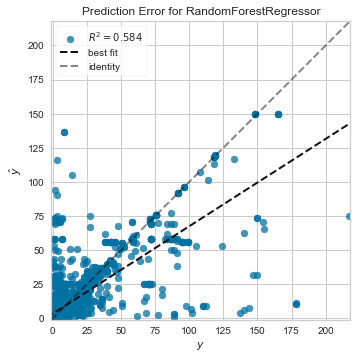

In [34]:
plot_model(modelo_proceso,'error')

In [33]:
save_model(modelo_proceso,model_name='modelo_procesos')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='dias proceso',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                        criterion='mse', max_depth=None,
                                        max_features='auto', max_leaf_nodes=None,
                                        max_sam

In [21]:
df.columns

Index(['NÚMERO PEDIDO', 'ORDEN NÚMERO', 'FECHA ORDEN', 'FECHA APROBACION',
       'CATEGORÍA', 'SUBCATEGORIA', 'PROVEEDOR', 'USUARIO',
       'USUARIO APROBADOR', 'DIRECCION PEDIDO', 'PORTAL', 'ESTADO',
       'PRODUCTO O SERVICIO', 'CANTIDAD PEDIDA', 'PRECIO UNITARIO',
       'PRECIO UNITARIO + IVA', 'IVA', 'TOTAL SIN IVA', 'TOTAL + IVA',
       'FECHA ULTIMO MOVIMIENTO', 'dia fecha aprobacion',
       'mes fecha aprobacion', 'semana del año aprobacion', 'dia fecha orden',
       'mes fecha orden', 'semana del año orden', 'dias para aprobación',
       'dias proceso'],
      dtype='object')

In [26]:
batche_prueba=df[['NÚMERO PEDIDO', 'ORDEN NÚMERO', 'FECHA ORDEN','CATEGORÍA','PRODUCTO O SERVICIO','CANTIDAD PEDIDA',
                 'USUARIO',
       'USUARIO APROBADOR','PROVEEDOR']]
batche_prueba.to_excel('batche_prueba.xlsx')